In [ ]:

import pandas as pd
import zipfile
import os
import json

In [12]:
path = os.path.dirname(os.path.abspath(__name__))

In [13]:
path

'/home/donbosco@chncorent.com/newdisk/interview/guvi/cricsheet_match_data_analysis'

In [2]:
odi_path = "/home/donbosco@chncorent.com/newdisk/interview/guvi/cricsheet_match_data_analysis/cricsheet_json/odis_json/64814.json"

In [64]:
import json

with open(odi_path,"r") as file:
    data = json.load(file)

In [65]:
data

{'meta': {'data_version': '1.1.0', 'created': '2023-01-16', 'revision': 1},
 'info': {'balls_per_over': 6,
  'city': 'Napier',
  'dates': ['2002-12-29'],
  'event': {'name': 'India tour of New Zealand', 'match_number': 2},
  'gender': 'male',
  'match_type': 'ODI',
  'match_type_number': 1927,
  'officials': {'match_referees': ['RS Madugalle'],
   'tv_umpires': ['BF Bowden'],
   'umpires': ['EAR de Silva', 'DB Cowie']},
  'outcome': {'winner': 'New Zealand', 'by': {'runs': 35}},
  'overs': 50,
  'player_of_match': ['V Sehwag'],
  'players': {'New Zealand': ['SP Fleming',
    'NJ Astle',
    'MS Sinclair',
    'CD McMillan',
    'L Vincent',
    'JDP Oram',
    'BB McCullum',
    'KD Mills',
    'DL Vettori',
    'DR Tuffey',
    'PA Hitchcock'],
   'India': ['SC Ganguly',
    'V Sehwag',
    'VVS Laxman',
    'R Dravid',
    'Yuvraj Singh',
    'M Kaif',
    'SB Bangar',
    'Harbhajan Singh',
    'Z Khan',
    'J Srinath',
    'A Nehra']},
  'registry': {'people': {'A Nehra': '96fd40a

In [66]:
match_info = {
    "match_type":data["info"]["match_type"],
    "venue":data["info"]["venue"],
    "city":data["info"]['city'],
    "date":data["info"]['dates'][-1],
    "team_1":data["info"]['teams'][0],
    "team_2":data["info"]["teams"][1],
    "toss_winner":data["info"]["toss"]["winner"],
    "toss_decision":data["info"]["toss"]["decision"],
    "winner":data["info"]["outcome"]["winner"],
    "win_by_runs":data["info"]["outcome"]["by"]["runs"]
}

In [67]:
match_info

{'match_type': 'ODI',
 'venue': 'McLean Park, Napier',
 'city': 'Napier',
 'date': '2002-12-29',
 'team_1': 'New Zealand',
 'team_2': 'India',
 'toss_winner': 'India',
 'toss_decision': 'field',
 'winner': 'New Zealand',
 'win_by_runs': 35}

In [68]:
df = pd.DataFrame([match_info])

In [69]:
df

,match_type,venue,city,date,team_1,team_2,toss_winner,toss_decision,winner,win_by_runs
0,ODI,"McLean Park, Napier",Napier,2002-12-29,New Zealand,India,India,field,New Zealand,35


In [89]:
records =[]
for inning in data["innings"]:
    team = inning["team"]
    for overs in inning["overs"]:
        over_num = overs["over"]
        for ball in overs["deliveries"]:
            delivery_info = {
                "team":team,
                "over":over_num,
                "batter":ball["batter"],
                "bowler":ball["bowler"],
                "non_striker":ball["non_striker"],
                "runs_batter":ball["runs"]["batter"],
                "runs_extras":ball["runs"]["extras"],
                "runs_total":ball["runs"]["total"]
            }
            if "wickets" in ball:
                delivery_info["wickets_player_out"] = ball["wickets"][0]["player_out"]
                delivery_info["wickets_kind"] = ball["wickets"][0]["kind"]
                # delivery_info["wickets_catch_by"] = ball["wickets"][0]["fielders"][-1]["name"]
            else:
                delivery_info["wickets_player_out"] = None
                delivery_info["wickets_kind"] = None
                # delivery_info["wickets_catch_by"] = None
            delivery_info.update(match_info)
        records.append(delivery_info)


In [90]:
records

[{'team': 'New Zealand',
  'over': 0,
  'batter': 'SP Fleming',
  'bowler': 'J Srinath',
  'non_striker': 'NJ Astle',
  'runs_batter': 0,
  'runs_extras': 0,
  'runs_total': 0,
  'wickets_player_out': None,
  'wickets_kind': None,
  'match_type': 'ODI',
  'venue': 'McLean Park, Napier',
  'city': 'Napier',
  'date': '2002-12-29',
  'team_1': 'New Zealand',
  'team_2': 'India',
  'toss_winner': 'India',
  'toss_decision': 'field',
  'winner': 'New Zealand',
  'win_by_runs': 35},
 {'team': 'New Zealand',
  'over': 1,
  'batter': 'NJ Astle',
  'bowler': 'Z Khan',
  'non_striker': 'SP Fleming',
  'runs_batter': 3,
  'runs_extras': 0,
  'runs_total': 3,
  'wickets_player_out': None,
  'wickets_kind': None,
  'match_type': 'ODI',
  'venue': 'McLean Park, Napier',
  'city': 'Napier',
  'date': '2002-12-29',
  'team_1': 'New Zealand',
  'team_2': 'India',
  'toss_winner': 'India',
  'toss_decision': 'field',
  'winner': 'New Zealand',
  'win_by_runs': 35},
 {'team': 'New Zealand',
  'over': 2,

In [73]:
full_df = pd.DataFrame(records)

In [74]:
full_df

,team,over,batter,bowler,non_striker,runs_batter,runs_extras,runs_total,wickets_player_out,wickets_kind,match_type,venue,city,date,team_1,team_2,toss_winner,toss_decision,winner,win_by_runs
0,India,43,Z Khan,KD Mills,J Srinath,1,0,1,None,None,ODI,"McLean Park, Napier",Napier,2002-12-29,New Zealand,India,India,field,New Zealand,35
1,India,43,J Srinath,KD Mills,Z Khan,0,0,0,J Srinath,caught,ODI,"McLean Park, Napier",Napier,2002-12-29,New Zealand,India,India,field,New Zealand,35
2,India,43,Z Khan,KD Mills,A Nehra,2,0,2,None,None,ODI,"McLean Park, Napier",Napier,2002-12-29,New Zealand,India,India,field,New Zealand,35
3,India,43,Z Khan,KD Mills,A Nehra,0,0,0,Z Khan,caught,ODI,"McLean Park, Napier",Napier,2002-12-29,New Zealand,India,India,field,New Zealand,35


In [2]:
import matplotlib.pyplot as plt

In [7]:
odi_df = pd.read_csv("/home/donbosco@chncorent.com/newdisk/interview/guvi/cricsheet_match_data_analysis/data/odis.csv")

In [107]:
odi_df

,team,over,batter,bowler,non_striker,runs_batter,runs_extras,runs_total,wickets_player_out,wickets_kind,match_type,venue,city,date,team_1,team_2,toss_winner,toss_decision,winner,win_by_runs
0,India,0,AA Deshpande,KH Brunt,A Chopra,4,0,4,NaN,NaN,ODI,North Sydney Oval,Sydney,2009-03-10,England,India,England,field,England,{}
1,India,1,A Chopra,IT Guha,AA Deshpande,0,0,0,NaN,NaN,ODI,North Sydney Oval,Sydney,2009-03-10,England,India,England,field,England,{}
2,India,2,AA Deshpande,KH Brunt,A Chopra,0,0,0,NaN,NaN,ODI,North Sydney Oval,Sydney,2009-03-10,England,India,England,field,England,{}
3,India,3,MDT Kamini,IT Guha,AA Deshpande,0,0,0,NaN,NaN,ODI,North Sydney Oval,Sydney,2009-03-10,England,India,England,field,England,{}
4,India,4,AA Deshpande,KH Brunt,MDT Kamini,0,0,0,NaN,NaN,ODI,North Sydney Oval,Sydney,2009-03-10,England,India,England,field,England,{}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249989,Ireland,35,GH Dockrell,SMSM Senanayake,MC Sorensen,0,0,0,NaN,NaN,ODI,"Clontarf Cricket Club Ground, Dublin",Dublin,2014-05-06,Sri Lanka,Ireland,Ireland,field,Sri Lanka,79
249990,Ireland,36,TJ Murtagh,KMDN Kulasekara,GH Dockrell,0,0,0,NaN,NaN,ODI,"Clontarf Cricket Club Ground, Dublin",Dublin,2014-05-06,Sri Lanka,Ireland,Ireland,field,Sri Lanka,79
249991,Ireland,37,TJ Murtagh,SMSM Senanayake,GH Dockrell,0,0,0,NaN,NaN,ODI,"Clontarf Cricket Club Ground, Dublin",Dublin,2014-05-06,Sri Lanka,Ireland,Ireland,field,Sri Lanka,79
249992,Ireland,38,TJ Murtagh,KMDN Kulasekara,GH Dockrell,2,0,2,NaN,NaN,ODI,"Clontarf Cricket Club Ground, Dublin",Dublin,2014-05-06,Sri Lanka,Ireland,Ireland,field,Sri Lanka,79


In [7]:
odi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249994 entries, 0 to 249993
Data columns (total 20 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   team                249994 non-null  object
 1   over                249994 non-null  int64 
 2   batter              249994 non-null  object
 3   bowler              249994 non-null  object
 4   non_striker         249994 non-null  object
 5   runs_batter         249994 non-null  int64 
 6   runs_extras         249994 non-null  int64 
 7   runs_total          249994 non-null  int64 
 8   wickets_player_out  8399 non-null    object
 9   wickets_kind        8399 non-null    object
 10  match_type          249994 non-null  object
 11  venue               249994 non-null  object
 12  city                223246 non-null  object
 13  date                249994 non-null  object
 14  team_1              249994 non-null  object
 15  team_2              249994 non-null  object
 16  to

In [112]:
odi_df.isnull().any()

team                  False
over                  False
batter                False
bowler                False
non_striker           False
runs_batter           False
runs_extras           False
runs_total            False
wickets_player_out     True
wickets_kind           True
match_type            False
venue                 False
city                   True
date                  False
team_1                False
team_2                False
toss_winner           False
toss_decision         False
winner                 True
win_by_runs           False
dtype: bool

/tmp/ipykernel_13639/4033593505.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


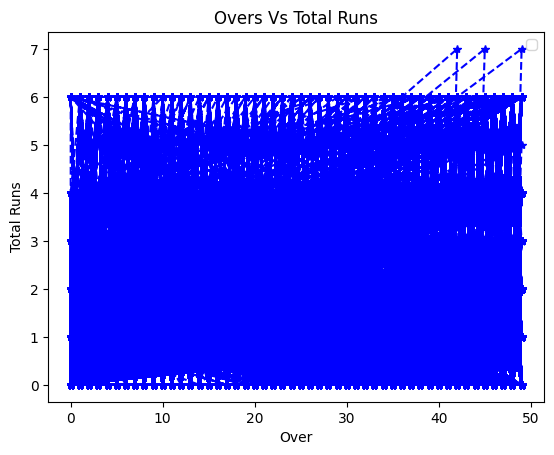

In [110]:
plt.plot(odi_df["over"],odi_df['runs_total'],color="blue",ls="--",marker="*")
plt.xlabel("Over")
plt.ylabel("Total Runs")
plt.title("Overs Vs Total Runs")
plt.legend()
plt.show()

In [5]:
winner_df = odi_df.dropna(how="any",axis=0)

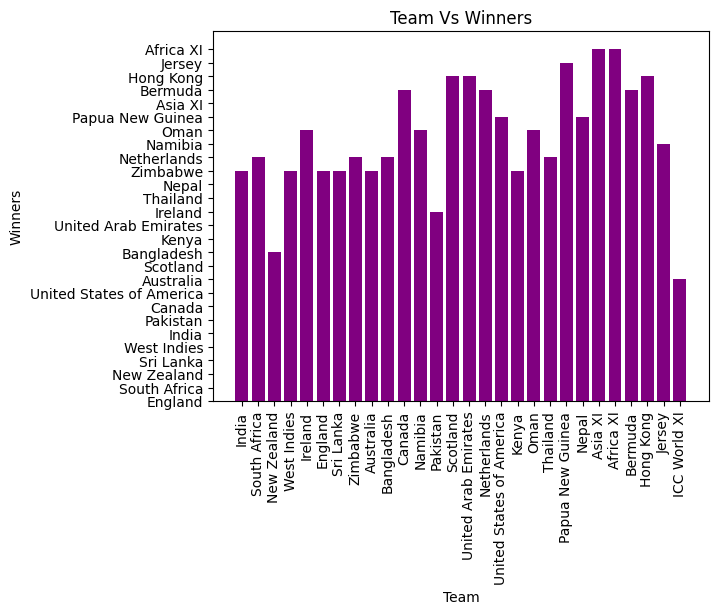

In [7]:
plt.bar(winner_df['team'],winner_df['winner'],color='purple')
plt.xlabel("Team")
plt.ylabel("Winners")
plt.title("Team Vs Winners")
plt.xticks(rotation=90,ha='center')
plt.show()

In [17]:
odi_df['runs_total'].isnull().any()

np.False_

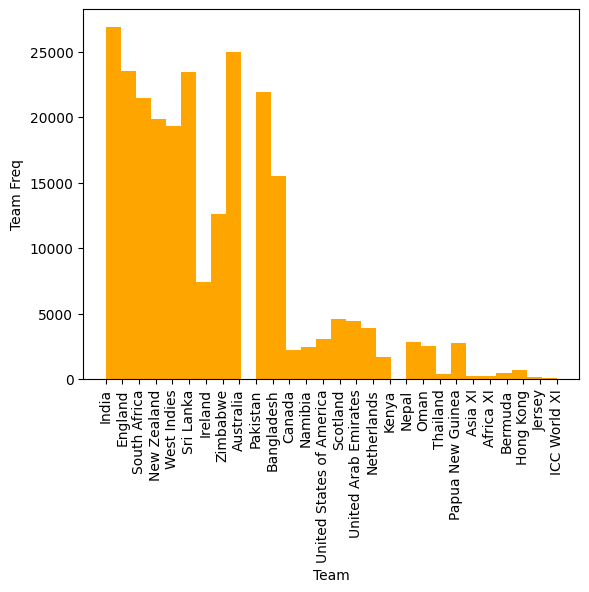

In [13]:
plt.hist(odi_df['team'],bins=30,color="orange")
plt.xlabel("Team")
plt.ylabel("Team Freq")
plt.xticks(rotation=90)
plt.show()

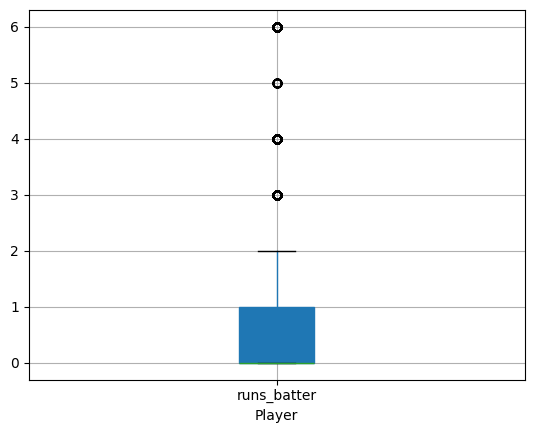

In [15]:
odi_df.boxplot(column="runs_batter",patch_artist=True)
plt.xlabel("Player")
plt.show()

In [ ]:
#1.Top run batsman ODI

# select batter,runs_batter from odi_matches order by runs_batter DESC LIMIT 10;

#2.Which batsman scored hight:

# SELECT batter, SUM(runs_batter) AS total_runs 
# FROM odi_matches  k
# GROUP BY batter 
# ORDER BY COUNT(runs_batter) DESC;

## 3.overall all team winning count in ODI
# select winner,count(winner) as total_win from odi_matches group by winner order by count(winner) desc;

## 4.team1 vs team 2 winning rate analyse
# SELECT 
#     LEAST(team_1, team_2) AS team_A,  
#     GREATEST(team_1, team_2) AS team_B,
#     COUNT(*) AS total_matches,
#     SUM(CASE WHEN winner = team_1 THEN 1 ELSE 0 END) AS team_1_wins,
#     SUM(CASE WHEN winner = team_2 THEN 1 ELSE 0 END) AS team_2_wins,
#     ROUND(100 * SUM(CASE WHEN winner = team_1 THEN 1 ELSE 0 END) / COUNT(*), 2) AS team_1_win_rate,
#     ROUND(100 * SUM(CASE WHEN winner = team_2 THEN 1 ELSE 0 END) / COUNT(*), 2) AS team_2_win_rate
# FROM odi_matches  
# WHERE winner IS NOT NULL  
# GROUP BY team_A, team_B
# ORDER BY total_matches DESC;
